In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('data/raw/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(data.info())
data.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1244 non-null   int64  
 1   sex       1244 non-null   object 
 2   bmi       1244 non-null   float64
 3   children  1244 non-null   int64  
 4   smoker    1244 non-null   object 
 5   region    1244 non-null   object 
 6   charges   1244 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 68.2+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1244.0,NaN,NaN,NaN,39.088424,14.055295,18.0,26.0,39.0,51.0,64.0
sex,1244,2,male,625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1244.0,NaN,NaN,NaN,30.582858,6.159513,15.96,26.06,30.21,34.61875,53.13
children,1244.0,NaN,NaN,NaN,1.103698,1.215885,0.0,0.0,1.0,2.0,5.0
smoker,1244,2,no,990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1244,4,southeast,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1244.0,NaN,NaN,NaN,13198.216342,12001.805804,1121.8739,4733.635288,9382.033,16579.959053,63770.42801


Проверим наличие пыстых полей

In [5]:
data.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пустых полей не замечено

На первый взгляд, все признаки должны влиять на медицинские расходы, потому необходимо проверить их.

Гипотеза 1 - С увеличением возраста, растут и средние медицинские расходы. 

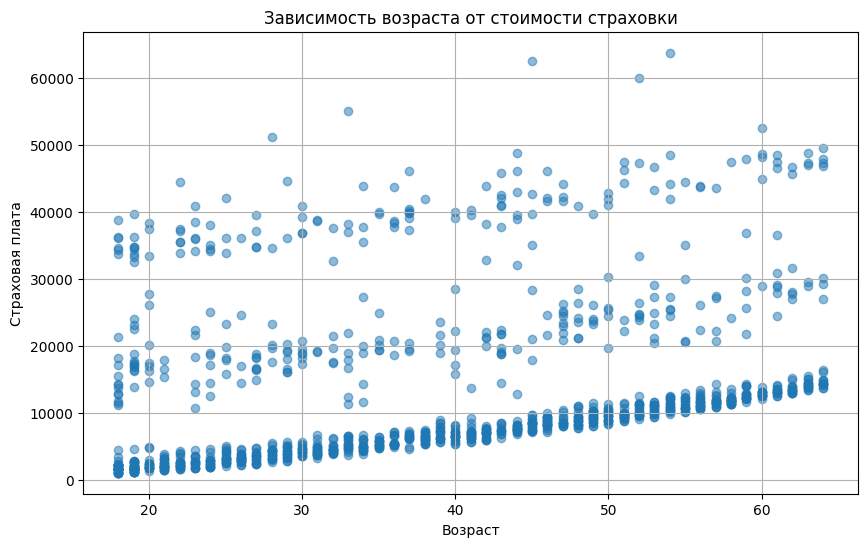

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['charges'], alpha=0.5)
plt.title('Зависимость возраста от стоимости страховки')
plt.xlabel('Возраст')
plt.ylabel('Страховая плата')
plt.grid(True)
plt.show()

Как видно, гипотеза подтверждается. На точечной диаграмме отчетливо заметен тренд роста медицинских расходов с увеличением возраста.
Гипотеза 2 - Средние медицинские расходы у мужчин будут выше, т.к. они чаще работают на опасных и вредных производствах

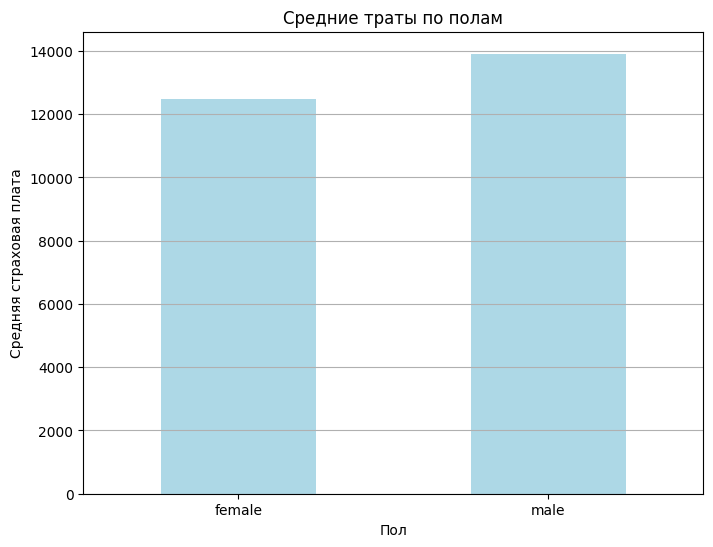

In [7]:
# Группировка данных по полу и расчет средних трат
avg_charges_by_sex = data.groupby('sex')['charges'].mean()

# График
plt.figure(figsize=(8, 6))
avg_charges_by_sex.plot(kind='bar', color='lightblue')
plt.title('Средние траты по полам')
plt.xlabel('Пол')
plt.ylabel('Средняя страховая плата')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Гпиотеза подтвердилась, средние расходы мужчин в выборке составляют около 14 тыс., а у женщин - порядка 12.5 тыс.

Гипотеза 3 - Отклонения от нормального индекса массы тела приводят к проблемам со здоровьем, следствие - увеличение расходов на медицину
Значение показателей ИМТ для людей возрастом от 18 до 65 лет, взятые из интернет источников
Недостаточный вес: ИМТ менее 18,5.
Нормальный вес: ИМТ от 18,5 до 24,9. 
Избыточный вес: ИМТ от 25 до 29,9. 
Ожирение: ИМТ от 30 и выше.

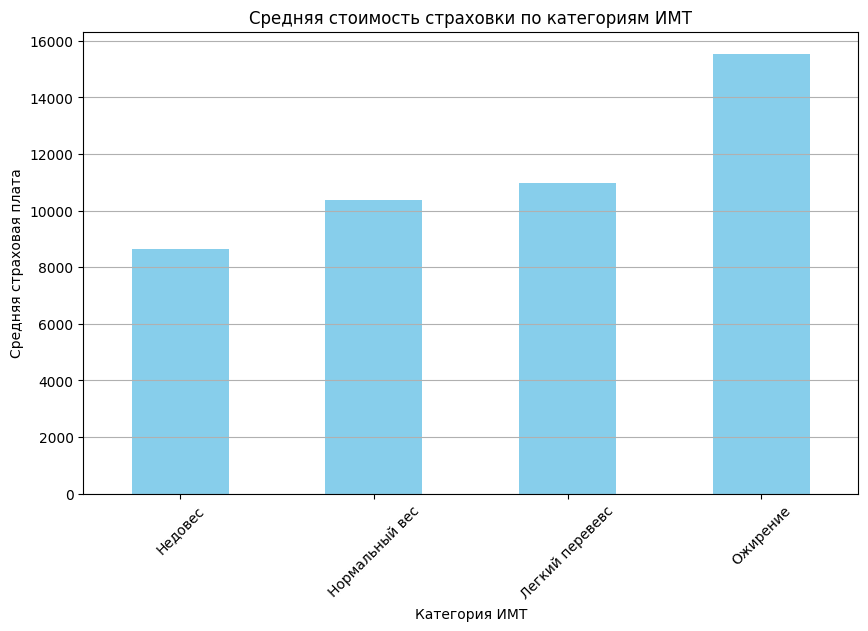

In [10]:
data_for_bmi = data.copy()
# Рассчитываем индекс массы тела (ИМТ)
data_for_bmi['bmi_category'] = pd.cut(data_for_bmi['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Недовес', 'Нормальный вес', 'Легкий перевевс', 'Ожирение'])

# Группировка данных по категориям ИМТ и расчет средней стоимости страховки
avg_charges_by_bmi = data_for_bmi.groupby('bmi_category', observed= True)['charges'].mean()

# График
plt.figure(figsize=(10, 6))
avg_charges_by_bmi.plot(kind='bar', color='skyblue')
plt.title('Средняя стоимость страховки по категориям ИМТ')
plt.xlabel('Категория ИМТ')
plt.ylabel('Средняя страховая плата')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Гипотеза 3 частично подтвердилась, люди с ИМТ превышающим норму тратят больше, однако люди с недовесом тратят меньше средств на медицину
Гипотеза 4 - Чем больше детей - тем больше расходы

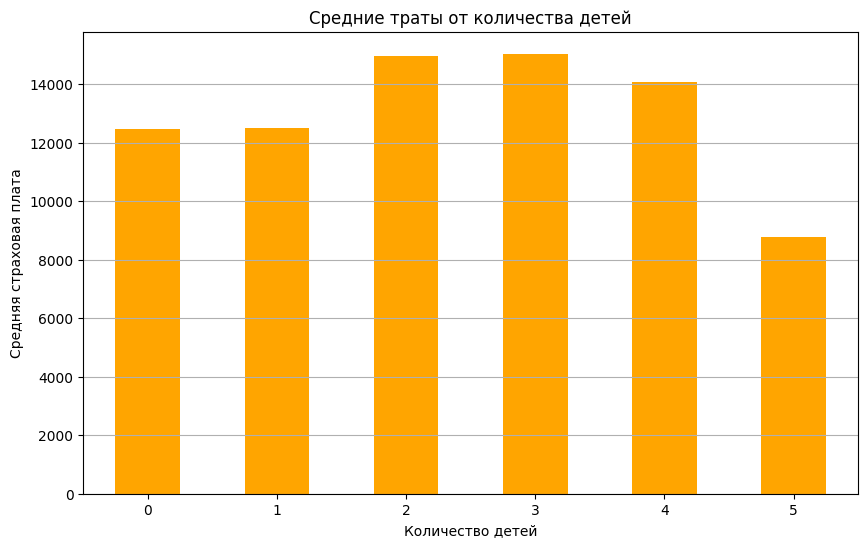

In [11]:
# Группировка данных по количеству детей и расчет средних трат
avg_charges_by_children = data.groupby('children')['charges'].mean()

# График
plt.figure(figsize=(10, 6))
avg_charges_by_children.plot(kind='bar', color='orange')
plt.title('Средние траты от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Средняя страховая плата')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Гипотеза 4 оказалась несостоятельна, средние траты при 0-1 ребенке в сеьме практически идентичны, наибольшие средние трабы при 2-3 детях, при 4 немного снижаются, а при 5 - становятся минимальны

Гипотеза 5 - Курильщики больше тратят на медицину, чем некурящие люди. Как известно, курение убивает.

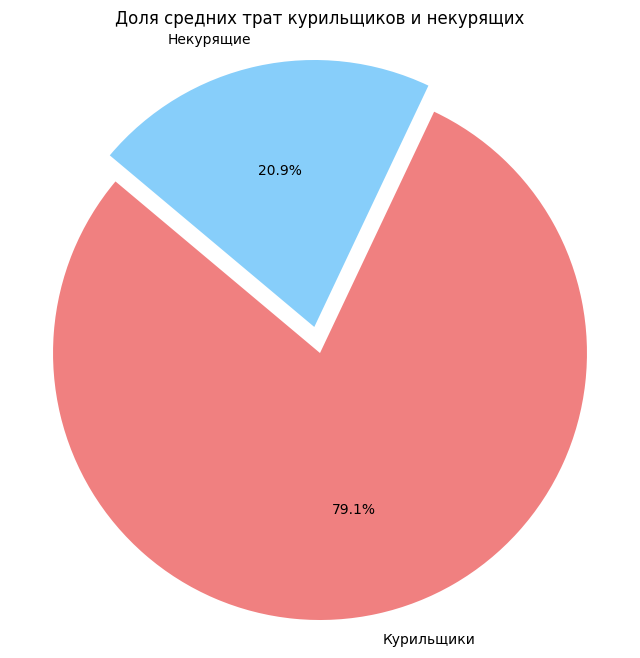

In [12]:
# Вычисление средних трат для курильщиков и некурильщиков
avg_charges_smoker = data[data['smoker'] == 'yes']['charges'].mean()
avg_charges_non_smoker = data[data['smoker'] == 'no']['charges'].mean()

# График
plt.figure(figsize=(8, 8))
labels = ['Курильщики', 'Некурящие']
sizes = [avg_charges_smoker, avg_charges_non_smoker]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # выделение курильщиков
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Доля средних трат курильщиков и некурящих')
plt.axis('equal')
plt.show()


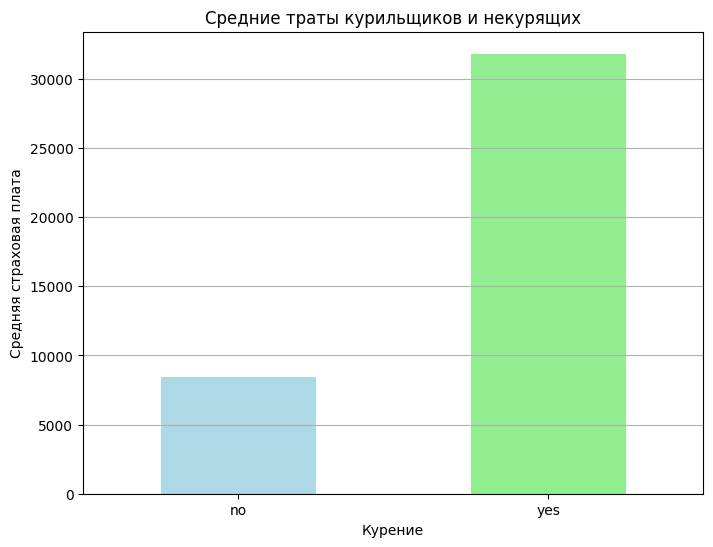

In [13]:
# Группировка данных по статусу курения и расчет средних трат
avg_charges_by_smoker = data.groupby('smoker')['charges'].mean()

# График
plt.figure(figsize=(8, 6))
avg_charges_by_smoker.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Средние траты курильщиков и некурящих')
plt.xlabel('Курение')
plt.ylabel('Средняя страховая плата')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Гипотеза 5 подтвердилась, средние траты курящих людей оказались сильно больше, чем у некурящих людей.

Теперь посмотрим на средние траты по регионам, которые вполне вероятно могут отличаться, т.к. в них можт отличаться климат/экология и еще большой набор факторов.

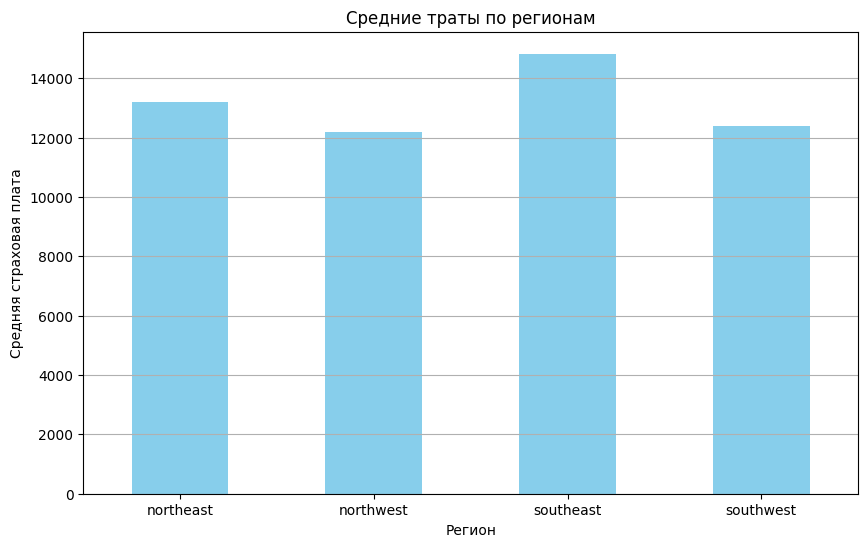

In [14]:
# Группировка данных по регионам и расчет средних трат
avg_charges_by_region = data.groupby('region')['charges'].mean()

# График
plt.figure(figsize=(10, 6))
avg_charges_by_region.plot(kind='bar', color='skyblue')
plt.title('Средние траты по регионам')
plt.xlabel('Регион')
plt.ylabel('Средняя страховая плата')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Как видно по диаграмме, северо-восток и юго-восток являются регионами с наибольшими средними медицинскими расходами, а северо-запад и юго-запад наоборот - с наименьшими и слабо отличаются друг от друга по величине.

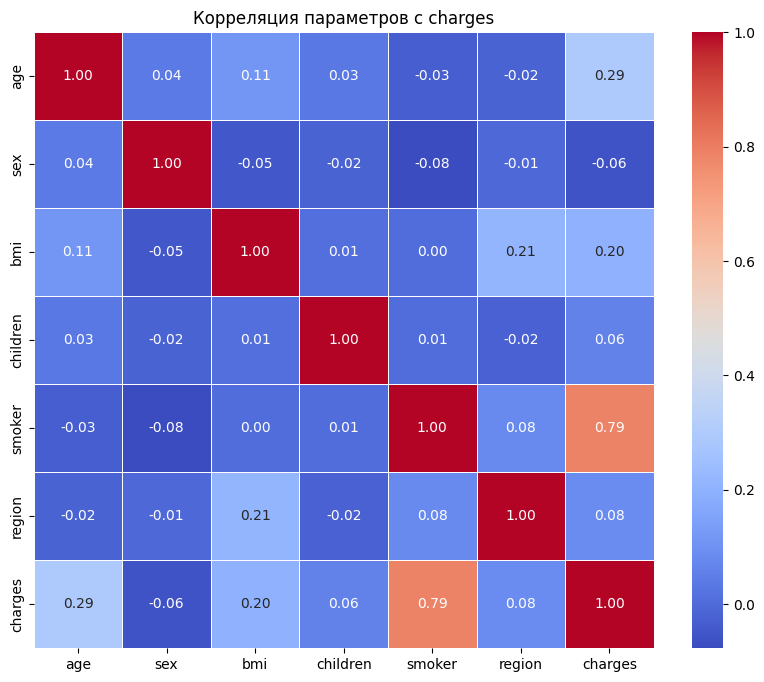

In [15]:
# Создаем копию данных для изменения
encoded_data = data.copy()

# Кодируем пол числом (0 для мужчин, 1 для женщин)
encoded_data['sex'] = encoded_data['sex'].map({'male': 0, 'female': 1})

# Кодируем регионы числами
encoded_data['region'] = encoded_data['region'].map({'northwest': 0, 'southwest': 1, 'northeast': 2, 'southeast': 3})
encoded_data['smoker'] = encoded_data['smoker'].map({'yes': 1, 'no': 0})

# Проверяем изменения
# Вычисляем матрицу корреляции для закодированных данных
corr_matrix = encoded_data.corr()



# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляция параметров с charges')
plt.show()


Исходя из матрицы корреляций, пол слабо влияет на размер медицинских трат, хотя построив обычную диаграмму пол - средние траты, ситуация казалась другой. Следовательно необходимо исключить пол.
Сильнее всего с размером медицинских трат коррелирует курит ли человек, его возраст и индекс массы тела. Этим параметры точно остаются в модели. А насчет региона и количества детей - как-будто слабая корреляция, потому для первого приближения можно их все-таки не учитывать.
Учитывая что возраст и индекс массы тела являются численными показателями, то кодировать неободимо только курит человек или нет (на данном этапе) в качестве 0 - нет, 1- да.

